# **AGEING SIGN DETECTION PROJECT** -         BATCH 20

**THIS CODE CHECKS IF THE GIVEN IMAGE HAS WRINKLES & DARKSPOTS**



***CREATING FOLDERS FOR SAVING THE DATASETS & MODELS***

In [1]:
%cd /content
!mkdir traning_demo
!mkdir traning_demo/pre-trained-models
!mkdir traning_demo/annotations
!mkdir traning_demo/export_model

/content


***INSTALLING TENSORFLOW LIBRARY*** 

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [3]:
import tensorflow as tf
print(tf.__version__)

2.5.0


***IMPORTING TENSORFLOW MODELS***

In [4]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57956, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 57956 (delta 233), reused 296 (delta 177), pack-reused 57594
Receiving objects: 100% (57956/57956), 573.13 MiB | 8.22 MiB/s, done.
Resolving deltas: 100% (40191/40191), done.


In [5]:
%cd /content/models/research

/content/models/research


In [6]:
!protoc object_detection/protos/*.proto --python_out=.

In [7]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 8.16 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [8]:
%cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


***BUILDING THE MODEL***

In [9]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [10]:
%cp -r pycocotools /content/models/research

In [11]:
%pwd

'/content/models/research/cocoapi/PythonAPI'

In [12]:
%cd ../..

/content/models/research


In [13]:
%cp object_detection/packages/tf2/setup.py  .

***DOWNLOAD PYTHON***

In [14]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 181kB/s 
     |████████████████████████████████| 358kB 31.1MB/s 
     |████████████████████████████████| 1.6MB 35.1MB/s 
     |████████████████████████████████| 829kB 38.0MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 2.3MB 39.1MB/s 
     |████████████████████████████████| 153kB 44.2MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 38.2MB 81kB/s 
     |████████████████████████████████| 686kB 33.8MB/s 
     |████████████████████████████████| 215kB 44.1MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 1.2MB 25.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 645kB 30.0MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1657639 sha256=ff4d64acd11d484084dd5197d2

In [15]:
!python object_detection/builders/model_builder_tf2_test.py

2021-06-25 08:33:55.916300: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-25 08:33:58.582741: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-25 08:33:58.656287: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-06-25 08:33:58.656350: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dc55e1ac51d8): /proc/driver/nvidia/version does not exist
2021-06-25 08:33:58.656786: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical oper

In [16]:
%cd /content/traning_demo/pre-trained-models

/content/traning_demo/pre-trained-models


***EFFICIENT NET MODELS FOR WRINKLES & DARKSPOTS*** 

In [17]:
# https://drive.google.com/file/d/1C8J5g7zRr3rfbr9db5Q8HCOfXglOG7Kb/view?usp=sharing

!gdown --id 1C8J5g7zRr3rfbr9db5Q8HCOfXglOG7Kb
!unzip efdnet_2C.zip
!mv /content/traning_demo/pre-trained-models/content/traning_demo/export_model /content/traning_demo/pre-trained-models
!mv /content/traning_demo/pre-trained-models/export_model darkspots


# https://drive.google.com/file/d/1-0zzdLi3bGk8zlGkAyBhQQPtf_bIuMep/view?usp=sharing
# Wrinkles
!gdown --id 1-0zzdLi3bGk8zlGkAyBhQQPtf_bIuMep
!unzip efdnet.zip
!mv /content/traning_demo/pre-trained-models/content/traning_demo/export_model /content/traning_demo/pre-trained-models
!mv /content/traning_demo/pre-trained-models/export_model Wrinkles


# https://drive.google.com/file/d/1zvHrTZBTLJVsGixF7us2ByPmiGgb3IOj/view?usp=sharing
# Darkspots
!gdown --id 1zvHrTZBTLJVsGixF7us2ByPmiGgb3IOj
!unzip darkspots.zip
!mv /content/traning_demo/pre-trained-models/content/fine_tuned_model /content/traning_demo/pre-trained-models
!mv /content/traning_demo/pre-trained-models/fine_tuned_model /content/traning_demo/pre-trained-models/darkspots

Downloading...
From: https://drive.google.com/uc?id=1C8J5g7zRr3rfbr9db5Q8HCOfXglOG7Kb
To: /content/traning_demo/pre-trained-models/efdnet_2C.zip
30.7MB [00:00, 66.2MB/s]
Archive:  efdnet_2C.zip
   creating: content/traning_demo/export_model/
  inflating: content/traning_demo/export_model/pipeline.config  
   creating: content/traning_demo/export_model/saved_model/
   creating: content/traning_demo/export_model/saved_model/assets/
  inflating: content/traning_demo/export_model/saved_model/saved_model.pb  
   creating: content/traning_demo/export_model/saved_model/variables/
  inflating: content/traning_demo/export_model/saved_model/variables/variables.index  
  inflating: content/traning_demo/export_model/saved_model/variables/variables.data-00000-of-00001  
   creating: content/traning_demo/export_model/checkpoint/
  inflating: content/traning_demo/export_model/checkpoint/ckpt-0.index  
  inflating: content/traning_demo/export_model/checkpoint/ckpt-0.data-00000-of-00001  
  inflating: 

In [18]:
%cd ..

/content/traning_demo


In [19]:
%ls

annotations/  export_model/  pre-trained-models/


In [20]:
# rm -r /content/traning_demo/dataset
!rm -r /content/traning_demo/export_model/
!mkdir export_model

***PRE-DEFINED DATASET***

In [21]:
# https://drive.google.com/file/d/1m3gm3tKGhTQ9a_i_cLD_SS005XMX7ZM_/view?usp=sharing

!gdown --id 1m3gm3tKGhTQ9a_i_cLD_SS005XMX7ZM_
!unzip /content/traning_demo/dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1m3gm3tKGhTQ9a_i_cLD_SS005XMX7ZM_
To: /content/traning_demo/dataset.zip
5.61MB [00:00, 34.1MB/s]
Archive:  /content/traning_demo/dataset.zip
   creating: dataset/
   creating: dataset/train/
  inflating: dataset/train/AGEING SPOTS rpk (1).jpeg  
  inflating: dataset/train/AGEING SPOTS rpk (1).xml  
  inflating: dataset/train/AGEING SPOTS rpk (2).jpeg  
  inflating: dataset/train/AGEING SPOTS rpk (2).xml  
  inflating: dataset/train/AGEING SPOTS rpk (3).jpeg  
  inflating: dataset/train/AGEING SPOTS rpk (3).xml  
  inflating: dataset/train/AGEING SPOTS rpk (4).jpeg  
  inflating: dataset/train/AGEING SPOTS rpk (4).xml  
  inflating: dataset/train/AGEING SPOTS rpk (5).jpeg  
  inflating: dataset/train/AGEING SPOTS rpk (5).xml  
  inflating: dataset/train/AGEING SPOTS rpk (6).jpeg  
  inflating: dataset/train/AGEING SPOTS rpk (6).xml  
  inflating: dataset/train/AGEING SPOTS rpk (7).jpeg  
  inflating: dataset/train/AGEING SPOTS rpk (7).

In [22]:
# https://drive.google.com/file/d/1C1vNYIgXbxhN1p4NgpKX_BU15DHGOQyw/view?usp=sharing
# required python files
!gdown --id 1C1vNYIgXbxhN1p4NgpKX_BU15DHGOQyw
!unzip python_files.zip
!mv label_map.pbtxt /content/traning_demo/annotations

Downloading...
From: https://drive.google.com/uc?id=1C1vNYIgXbxhN1p4NgpKX_BU15DHGOQyw
To: /content/traning_demo/python_files.zip
100% 6.93k/6.93k [00:00<00:00, 5.74MB/s]
Archive:  python_files.zip
  inflating: exporter_main_v2.py     
  inflating: generate_tfrecord.py    
  inflating: label_map.pbtxt         
  inflating: model_main_tf2.py       


***TRAINED & TESTED DATASET***

In [23]:
# Create training data:
!python /content/traning_demo/generate_tfrecord.py -x /content/traning_demo/dataset/train -l /content/traning_demo/annotations/label_map.pbtxt -o /content/traning_demo/annotations/train.record

# Create testing data:
!python /content/traning_demo/generate_tfrecord.py -x /content/traning_demo/dataset/test -l /content/traning_demo/annotations/label_map.pbtxt -o/content/traning_demo/annotations/test.record

Successfully created the TFRecord file: /content/traning_demo/annotations/train.record
Successfully created the TFRecord file: /content/traning_demo/annotations/test.record


In [24]:
!mkdir my_model

In [25]:
%cd /content/traning_demo

/content/traning_demo


In [26]:
%pwd

'/content/traning_demo'

In [27]:
!rm -r /content/traning_demo/export_model
!mkdir export_model

In [28]:
!python /content/traning_demo/model_main_tf2.py --model_dir=/content/traning_demo/my_model --pipeline_config_path=/content/traning_demo/my_model/pipeline.config

2021-06-25 08:35:00.237048: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-25 08:35:02.656136: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-25 08:35:02.668276: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-06-25 08:35:02.668334: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dc55e1ac51d8): /proc/driver/nvidia/version does not exist
2021-06-25 08:35:02.668749: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0625 

***DEFINE MODEL PATHS FOR WRINKLES & DARKSPOTS***

In [29]:
%%time

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)



# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR_WRINKLES = '/content/traning_demo/pre-trained-models/Wrinkles'

MIN_CONF_THRESH = float(0.10)

# LOAD THE MODEL
PATH_TO_SAVED_MODEL_WRINKLES = PATH_TO_MODEL_DIR_WRINKLES + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn_wrinkles = tf.saved_model.load(PATH_TO_SAVED_MODEL_WRINKLES)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...

Done! Took 29.45775055885315 seconds
CPU times: user 28.2 s, sys: 2.1 s, total: 30.3 s
Wall time: 29.7 s


In [30]:
PATH_TO_MODEL_DIR_DARKSPOTS = '/content/traning_demo/pre-trained-models/darkspots'

MIN_CONF_THRESH = float(0.10)

# LOAD THE MODEL
PATH_TO_SAVED_MODEL_DARKSPOTS = PATH_TO_MODEL_DIR_DARKSPOTS + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn_darkspots = tf.saved_model.load(PATH_TO_SAVED_MODEL_DARKSPOTS)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...

Done! Took 31.149651765823364 seconds


***Efficientnet model - puffy eyes***

In [31]:
# https://drive.google.com/file/d/1fMsK5T1S0rkzzth5wVcMHDbY4H5gYZTA/view?usp=sharing
!gdown --id 1fMsK5T1S0rkzzth5wVcMHDbY4H5gYZTA

Downloading...
From: https://drive.google.com/uc?id=1fMsK5T1S0rkzzth5wVcMHDbY4H5gYZTA
To: /content/traning_demo/efficientnet.h5
16.7MB [00:00, 41.1MB/s]


***Facial landmarks predictor model***

In [32]:
# https://drive.google.com/file/d/1OzT-szWYdMFQIVX-KQ7PMLhjuSdgAf7Z/view?usp=sharing
!gdown --id 1OzT-szWYdMFQIVX-KQ7PMLhjuSdgAf7Z

Downloading...
From: https://drive.google.com/uc?id=1OzT-szWYdMFQIVX-KQ7PMLhjuSdgAf7Z
To: /content/traning_demo/shape_predictor_81_face_landmarks.dat
19.7MB [00:00, 61.0MB/s]


***REQUIRED LIBRARIES***

In [33]:
import os


from keras.models import load_model
import numpy as np
import cv2
from PIL import Image
from numpy import asarray


import sys
import os
import dlib
import glob
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

***MARKING FACE POINTS***

In [34]:
predictor_path = 'shape_predictor_81_face_landmarks.dat'


def face_extract(path):

    img=cv2.imread(path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_face_detector = dlib.get_frontal_face_detector()

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    dets = detector(img, 0)

    facePoints = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 78, 74, 79, 73, 72, 80, 71, 70, 69, 68, 76, 75, 77, 0]

    for k, d in enumerate(dets):
        shape = predictor(img, d)
        landmarks = np.matrix([[p.x, p.y] for p in shape.parts()])

        mask = np.zeros(img.shape[:2], np.uint8)

        face = np.array([ [shape.parts()[num].x, shape.parts()[num].y] for num in facePoints ])

        cv2.drawContours(mask, [np.array(face)], -1, (255, 255, 255), -1, cv2.LINE_AA)

        dst = cv2.bitwise_and(img, img, mask=mask)

        plt.figure(figsize=(10, 10))
        plt.imshow(dst)
        return dst, img

***DETECTION MODEL FOR WRINKLES & DARK SPOTS***

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import cv2
warnings.filterwarnings('ignore')


def effecientDet_wrinkles(path):

  # IMAGE_PATHS = path

  PATH_TO_LABELS = '/content/traning_demo/annotations/label_map.pbtxt'

  category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


  print('Running inference... ', end='')

  # image = cv2.imread(IMAGE_PATHS)
  image = path
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image_rgb, axis=0)


  input_tensor = tf.convert_to_tensor(image)

  input_tensor = input_tensor[tf.newaxis, ...]


  detections = detect_fn_wrinkles(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_with_detections = image.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.4,
        agnostic_mode=False)

  return image_with_detections

def effecientDet_darkspots(path):

  # IMAGE_PATHS = path

  PATH_TO_LABELS = '/content/traning_demo/annotations/label_map.pbtxt'

  category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


  print('Running inference... ', end='')

  # image = cv2.imread(IMAGE_PATHS)
  image = path
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image_rgb, axis=0)


  input_tensor = tf.convert_to_tensor(image)

  input_tensor = input_tensor[tf.newaxis, ...]


  detections = detect_fn_darkspots(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_with_detections = image.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.4,
        agnostic_mode=False)

  return image_with_detections

In [36]:
def load_img(path) :
  img=cv2.imread(path)
  return img

***USER INPUT***

In [37]:
import cv2
fp = input("Enter file path: ")

Enter file path: /content/download.jpg


***ANALYSIS & OUTPUT***

Running inference... Running inference... 

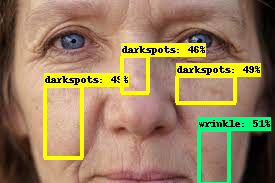

True

In [38]:
img = load_img(fp)
orgImg = img
img = effecientDet_wrinkles(img)
#cv2_imshow(img)
img = effecientDet_darkspots(img)
#cv2_imshow(img)
orgImg = img.copy()
#left_eye, right_eye, eye_points, img = eyes(img)    
#img, percent = predict_puffyeyes(left_eye, right_eye, eye_points, img, img)
cv2_imshow(img)

cv2.imwrite(fp, img)